In [1]:
from lifelines import WeibullAFTFitter, LogNormalAFTFitter, LogLogisticAFTFitter, PiecewiseExponentialRegressionFitter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('telco.csv') 
df.head()

,ID,region,tenure,age,marital,address,income,ed,retire,gender,voice,internet,forward,custcat,churn
0,1,Zone 2,13,44,Married,9,64,College degree,No,Male,No,No,Yes,Basic service,Yes
1,2,Zone 3,11,33,Married,7,136,Post-undergraduate degree,No,Male,Yes,No,Yes,Total service,Yes
2,3,Zone 3,68,52,Married,24,116,Did not complete high school,No,Female,No,No,No,Plus service,No
3,4,Zone 2,33,33,Unmarried,12,33,High school degree,No,Female,No,No,No,Basic service,Yes
4,5,Zone 2,23,30,Married,9,30,Did not complete high school,No,Male,No,No,Yes,Plus service,No


In [3]:
categorical_columns = df.select_dtypes(include='object').columns.tolist()
print(categorical_columns)
df_dummy = pd.get_dummies(df, columns=categorical_columns, prefix=categorical_columns, drop_first=True)
df_dummy.head()

['region', 'marital', 'ed', 'retire', 'gender', 'voice', 'internet', 'forward', 'custcat', 'churn']


,ID,tenure,age,address,income,region_Zone 2,region_Zone 3,marital_Unmarried,ed_Did not complete high school,ed_High school degree,...,ed_Some college,retire_Yes,gender_Male,voice_Yes,internet_Yes,forward_Yes,custcat_E-service,custcat_Plus service,custcat_Total service,churn_Yes
0,1,13,44,9,64,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True
1,2,11,33,7,136,False,True,False,False,False,...,False,False,True,True,False,True,False,False,True,True
2,3,68,52,24,116,False,True,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,4,33,33,12,33,True,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True
4,5,23,30,9,30,True,False,False,True,False,...,False,False,True,False,False,True,False,True,False,False


In [4]:
wb_aft = WeibullAFTFitter()

wb_aft.fit(df_dummy, duration_col='tenure', event_col='churn_Yes')
wb_aft_predict = wb_aft.predict_survival_function(df_dummy).transpose()
avg_wb_aft = wb_aft_predict.mean().to_list()
wb_aft_predict.head()

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0
0,0.995732,0.990209,0.984110,0.977620,0.970837,0.963823,0.956621,0.949264,0.941778,0.934182,...,0.536898,0.530555,0.524267,0.518035,0.511858,0.505737,0.499670,0.493660,0.487704,0.481803
1,0.998199,0.995862,0.993272,0.990506,0.987604,0.984591,0.981484,0.978296,0.975037,0.971715,...,0.769425,0.765581,0.761745,0.757915,0.754093,0.750280,0.746474,0.742676,0.738887,0.735106
2,0.999762,0.999453,0.999110,0.998743,0.998357,0.997955,0.997539,0.997111,0.996672,0.996224,...,0.966032,0.965394,0.964755,0.964114,0.963472,0.962828,0.962182,0.961535,0.960887,0.960238
3,0.994751,0.987967,0.980485,0.972535,0.964240,0.955676,0.946897,0.937946,0.928852,0.919644,...,0.465227,0.458474,0.451798,0.445199,0.438676,0.432230,0.425860,0.419566,0.413347,0.407202
4,0.998299,0.996092,0.993646,0.991034,0.988292,0.985445,0.982508,0.979495,0.976413,0.973272,...,0.780765,0.777081,0.773404,0.769732,0.766067,0.762408,0.758756,0.755111,0.751473,0.747842


In [5]:
logn_aft = LogNormalAFTFitter()

logn_aft.fit(df_dummy, duration_col='tenure', event_col='churn_Yes')
logn_aft_predict = logn_aft.predict_survival_function(df_dummy).transpose()
avg_logn_aft = logn_aft_predict.mean().to_list()
logn_aft_predict.head()

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0
0,0.999400,0.996630,0.991798,0.985377,0.977771,0.969295,0.960184,0.950616,0.940729,0.930625,...,0.529900,0.525114,0.520399,0.515753,0.511174,0.506662,0.502215,0.497832,0.493511,0.489251
1,0.999872,0.999120,0.997586,0.995320,0.992413,0.988960,0.985044,0.980741,0.976112,0.971212,...,0.689157,0.684897,0.680678,0.676502,0.672366,0.668271,0.664215,0.660200,0.656223,0.652285
2,1.000000,0.999999,0.999994,0.999985,0.999969,0.999945,0.999911,0.999867,0.999811,0.999745,...,0.980761,0.980190,0.979615,0.979034,0.978449,0.977858,0.977264,0.976664,0.976060,0.975452
3,0.998846,0.994103,0.986399,0.976646,0.965509,0.953455,0.940810,0.927806,0.914610,0.901344,...,0.453749,0.448987,0.444306,0.439704,0.435180,0.430731,0.426355,0.422051,0.417817,0.413652
4,0.999941,0.999551,0.998699,0.997378,0.995619,0.993468,0.990968,0.988161,0.985087,0.981777,...,0.753795,0.749989,0.746212,0.742463,0.738743,0.735051,0.731387,0.727752,0.724144,0.720563


In [6]:
logl_aft = LogLogisticAFTFitter()

logl_aft.fit(df_dummy, duration_col='tenure', event_col='churn_Yes')
logl_aft_predict = logl_aft.predict_survival_function(df_dummy).transpose()
avg_logl_aft = logl_aft_predict.mean().to_list()
logl_aft_predict

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0
0,0.997306,0.992858,0.987403,0.981203,0.974413,0.967141,0.959468,0.951459,0.943168,0.934641,...,0.514846,0.509286,0.503810,0.498416,0.493104,0.487872,0.482719,0.477644,0.472646,0.467722
1,0.998828,0.996885,0.994489,0.991748,0.988723,0.985457,0.981982,0.978321,0.974495,0.970521,...,0.709570,0.704963,0.700386,0.695839,0.691323,0.686838,0.682383,0.677960,0.673568,0.669208
2,0.999929,0.999810,0.999663,0.999494,0.999306,0.999103,0.998885,0.998653,0.998410,0.998155,...,0.975700,0.975166,0.974630,0.974091,0.973550,0.973005,0.972458,0.971908,0.971356,0.970801
3,0.996363,0.990373,0.983052,0.974765,0.965731,0.956103,0.945997,0.935505,0.924705,0.913661,...,0.439870,0.434395,0.429020,0.423743,0.418563,0.413477,0.408483,0.403580,0.398764,0.394035
4,0.999161,0.997768,0.996049,0.994079,0.991901,0.989546,0.987035,0.984385,0.981609,0.978719,...,0.773393,0.769469,0.765560,0.761666,0.757787,0.753924,0.750076,0.746245,0.742431,0.738634
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.991091,0.976620,0.959272,0.940068,0.919636,0.898419,0.876744,0.854863,0.832970,0.811217,...,0.241783,0.237727,0.233780,0.229937,0.226196,0.222553,0.219004,0.215546,0.212176,0.208891
996,0.981444,0.952063,0.918023,0.881766,0.844741,0.807881,0.771794,0.736873,0.703358,0.671385,...,0.131654,0.129131,0.126687,0.124319,0.122024,0.119799,0.117641,0.115547,0.113514,0.111540
997,0.999796,0.999457,0.999037,0.998554,0.998019,0.997438,0.996817,0.996158,0.995466,0.994742,...,0.933506,0.932112,0.930712,0.929308,0.927899,0.926486,0.925068,0.923647,0.922221,0.920792
998,0.998882,0.997028,0.994741,0.992124,0.989236,0.986116,0.982795,0.979296,0.975639,0.971838,...,0.719169,0.714653,0.710164,0.705703,0.701271,0.696867,0.692491,0.688145,0.683827,0.679538


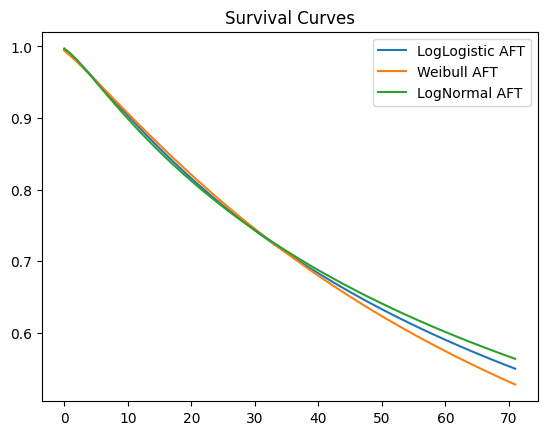

In [7]:
plt.plot(avg_logl_aft, label = 'LogLogistic AFT')
plt.plot(avg_wb_aft, label = "Weibull AFT")
plt.plot(avg_logn_aft, label = "LogNormal AFT")
plt.legend()
plt.title("Survival Curves")
plt.show()

In [8]:
for model in [wb_aft, logn_aft, logl_aft]:
    print("The AIC for", model.__class__.__name__, ":",  model.AIC_)

The AIC for WeibullAFTFitter : 2958.357126946646
The AIC for LogNormalAFTFitter : 2950.3002131922785
The AIC for LogLogisticAFTFitter : 2952.2582596356688


LogNormalAFTFitter has the lowest AIC => it fits our data the best

In our case:
duration column is the "tenure",
event column is the "churn"

an increase of one unit in any of the indepedndent variables will result in an increase in the dependent variable for (exp(coef) - 1) * 100%.

Also, if a feature has a high p-value, it indicates that it is statistically insignificant. We can drop such features from our model.

In [9]:
df_new = df_dummy[['age','churn_Yes','tenure','marital_Unmarried','internet_Yes', 'custcat_E-service', 'custcat_Plus service','custcat_Total service','voice_Yes']]

In [10]:
logn_aft = LogNormalAFTFitter()
logn_aft.fit(df_new, duration_col='tenure', event_col='churn_Yes')
logn_aft_predict = logn_aft.predict_survival_function(df_new).transpose()
logn_aft_predict

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0
0,0.999702,0.998274,0.995688,0.992141,0.987825,0.982900,0.977494,0.971708,0.965623,0.959306,...,0.652254,0.647972,0.643738,0.639552,0.635411,0.631317,0.627268,0.623263,0.619302,0.615384
1,0.999676,0.998147,0.995398,0.991649,0.987106,0.981938,0.976281,0.970240,0.963900,0.957329,...,0.644022,0.639704,0.635436,0.631217,0.627045,0.622920,0.618842,0.614810,0.610823,0.606880
2,0.999995,0.999954,0.999848,0.999665,0.999397,0.999045,0.998608,0.998090,0.997493,0.996822,...,0.915822,0.914022,0.912221,0.910421,0.908621,0.906822,0.905023,0.903226,0.901429,0.899634
3,0.996065,0.984172,0.967919,0.949481,0.930031,0.910229,0.890463,0.870964,0.851870,0.833262,...,0.350439,0.346164,0.341974,0.337868,0.333841,0.329894,0.326022,0.322224,0.318498,0.314842
4,0.999757,0.998558,0.996344,0.993264,0.989479,0.985124,0.980310,0.975128,0.969651,0.963938,...,0.672584,0.668400,0.664259,0.660163,0.656109,0.652098,0.648128,0.644200,0.640313,0.636465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.998201,0.991858,0.982346,0.970861,0.958165,0.944747,0.930930,0.916930,0.902898,0.888936,...,0.448133,0.443563,0.439071,0.434656,0.430315,0.426046,0.421848,0.417719,0.413658,0.409662
996,0.996532,0.985775,0.970844,0.953729,0.935532,0.916891,0.898187,0.879653,0.861433,0.843615,...,0.366234,0.361892,0.357635,0.353459,0.349364,0.345347,0.341405,0.337536,0.333740,0.330013
997,0.999801,0.998786,0.996875,0.994186,0.990847,0.986977,0.982672,0.978012,0.973063,0.967879,...,0.691192,0.687108,0.683065,0.679062,0.675099,0.671175,0.667290,0.663443,0.659634,0.655862
998,0.999837,0.998984,0.997348,0.995013,0.992087,0.988668,0.984840,0.980673,0.976226,0.971547,...,0.709784,0.705812,0.701878,0.697980,0.694119,0.690294,0.686504,0.682750,0.679030,0.675345


In [11]:
logn_aft.predict_hazard(df_new).transpose()

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0,72.0
0,0.000808,0.002039,0.003114,0.003992,0.004701,0.005275,0.005741,0.006121,0.006432,0.006688,...,0.006602,0.006571,0.006540,0.006510,0.006480,0.006450,0.006420,0.006390,0.006361,0.006332
1,0.000872,0.002176,0.003301,0.004213,0.004944,0.005532,0.006008,0.006393,0.006707,0.006964,...,0.006743,0.006711,0.006679,0.006647,0.006615,0.006584,0.006553,0.006522,0.006491,0.006461
2,0.000017,0.000070,0.000143,0.000225,0.000310,0.000395,0.000479,0.000559,0.000636,0.000710,...,0.001966,0.001970,0.001974,0.001977,0.001981,0.001984,0.001987,0.001990,0.001992,0.001994
3,0.008604,0.014792,0.018185,0.020102,0.021191,0.021789,0.022080,0.022175,0.022141,0.022020,...,0.012323,0.012225,0.012129,0.012034,0.011942,0.011851,0.011761,0.011674,0.011587,0.011503
4,0.000666,0.001730,0.002685,0.003481,0.004134,0.004671,0.005112,0.005477,0.005779,0.006031,...,0.006255,0.006227,0.006200,0.006173,0.006146,0.006119,0.006092,0.006066,0.006040,0.006014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.004236,0.008239,0.010847,0.012556,0.013695,0.014460,0.014972,0.015308,0.015518,0.015637,...,0.010286,0.010214,0.010143,0.010072,0.010003,0.009936,0.009869,0.009803,0.009738,0.009674
996,0.007679,0.013473,0.016750,0.018654,0.019774,0.020419,0.020763,0.020912,0.020930,0.020859,...,0.011974,0.011880,0.011788,0.011698,0.011610,0.011523,0.011437,0.011353,0.011271,0.011190
997,0.000555,0.001479,0.002330,0.003053,0.003655,0.004156,0.004574,0.004923,0.005215,0.005461,...,0.005938,0.005914,0.005889,0.005865,0.005841,0.005817,0.005793,0.005770,0.005746,0.005723
998,0.000458,0.001255,0.002009,0.002661,0.003213,0.003678,0.004070,0.004401,0.004682,0.004921,...,0.005622,0.005601,0.005579,0.005558,0.005537,0.005516,0.005495,0.005474,0.005453,0.005432


In [12]:
MM = 1300
sequence = range(1,len(logn_aft_predict.columns)+1)
r = 0.1
for num in sequence:
    logn_aft_predict.loc[:,num] = logn_aft_predict.loc[:,num]/((1+r/12)**(sequence[num-1]-1))

logn_aft_predict["CLV"] = MM * logn_aft_predict.sum(axis = 1)
logn_aft_predict["CLV"]

0      57850.908805
1      57479.570956
2      68200.953826
3      41869.703973
4      58755.030186
           ...     
995    47651.141238
996    42854.667172
997    59566.689108
998    60362.813245
999    54342.833847
Name: CLV, Length: 1000, dtype: float64

In [13]:
df["CLV"] = logn_aft_predict.CLV

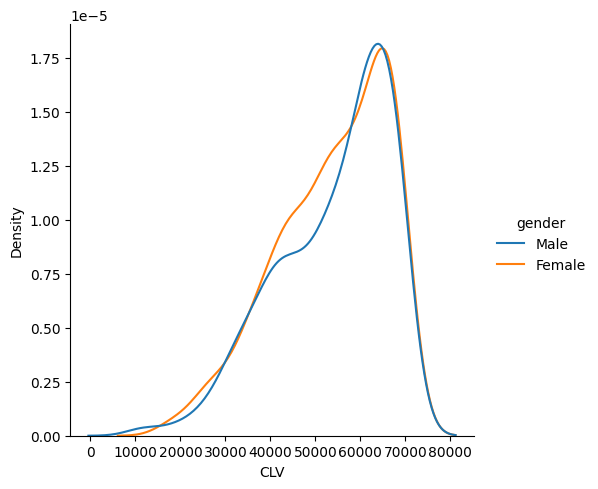

In [14]:
sns.displot(data=df, kind='kde', x='CLV', hue='gender')

In [15]:
df.groupby("gender")[["CLV"]].mean()

,CLV
gender,
Female,53701.340314
Male,54098.400381


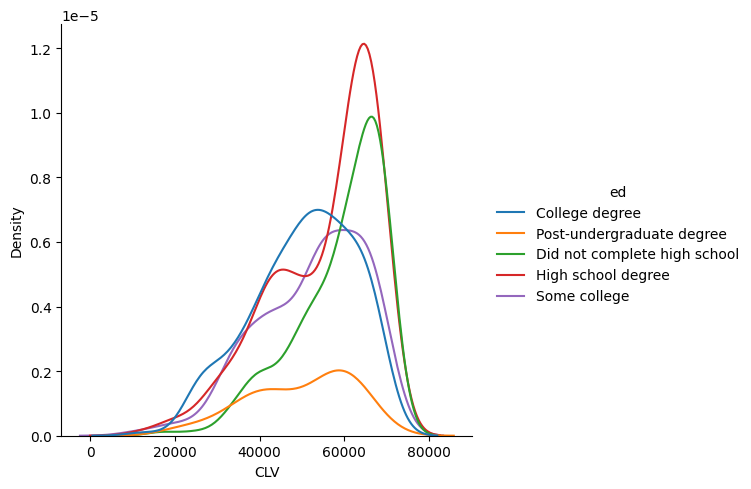

In [16]:
sns.displot(data=df, kind='kde', x='CLV', hue='ed')

In [17]:
df.groupby("ed")[["CLV"]].mean()

,CLV
ed,
College degree,50399.631982
Did not complete high school,58879.324077
High school degree,55195.507455
Post-undergraduate degree,49665.907805
Some college,52484.037207


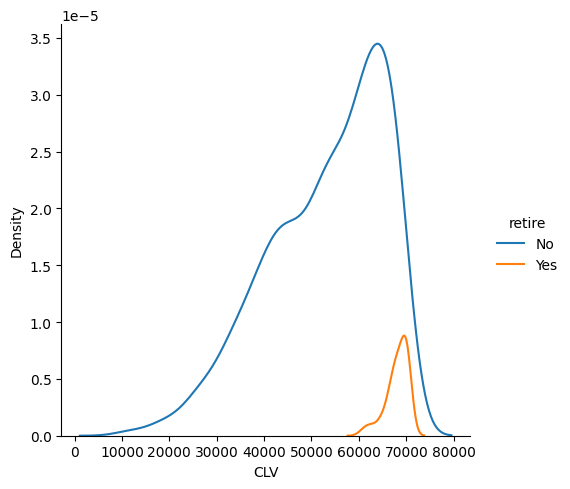

In [18]:
sns.displot(data=df, kind='kde', x='CLV', hue='retire')

In [19]:
df.groupby("retire")[["CLV"]].mean()

,CLV
retire,
No,53193.967058
Yes,68069.568515


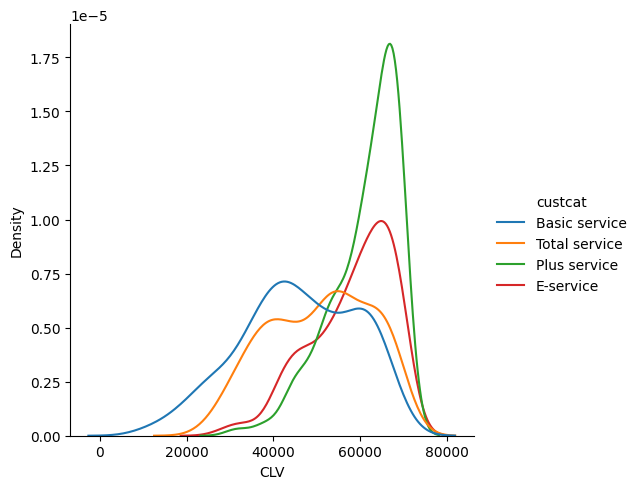

In [20]:
sns.displot(data=df, kind='kde', x='CLV', hue='custcat')

In [21]:
df.groupby("custcat")[["CLV"]].mean()

,CLV
custcat,
Basic service,45753.385036
E-service,58074.728864
Plus service,61091.329827
Total service,50651.864671


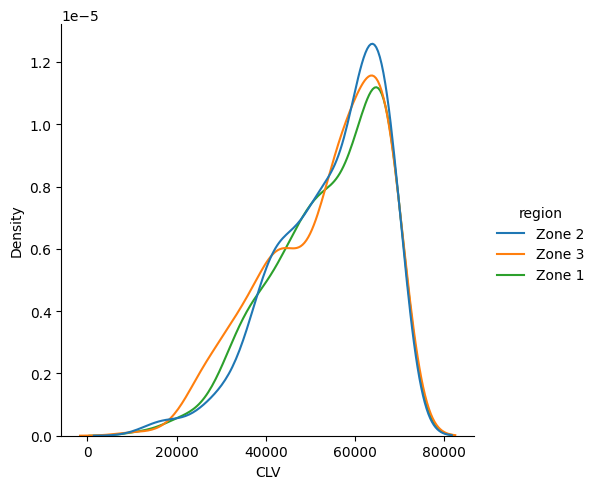

In [22]:
sns.displot(data=df, kind='kde', x='CLV', hue='region')

In [23]:
df.groupby("region")[["CLV"]].mean()

,CLV
region,
Zone 1,54006.405495
Zone 2,54504.918723
Zone 3,53193.066581


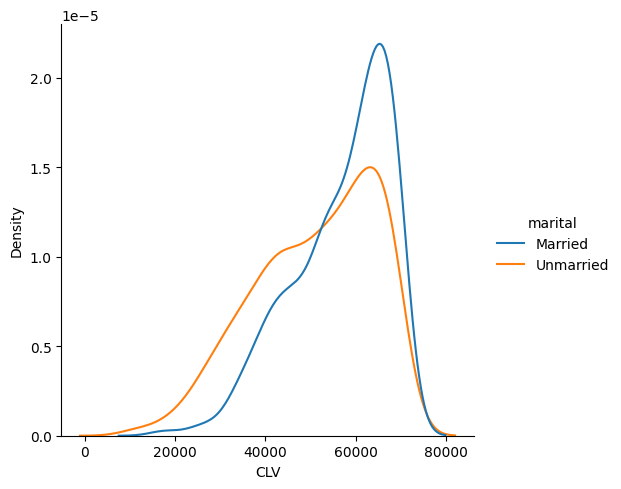

In [24]:
sns.displot(data=df, kind='kde', x='CLV', hue='marital')

In [25]:
df.groupby("marital")[["CLV"]].mean()

,CLV
marital,
Married,56793.361151
Unmarried,51050.310013


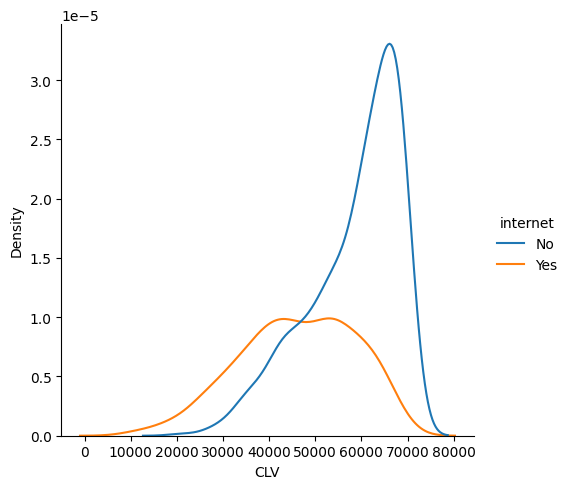

In [26]:
sns.displot(data=df, kind='kde', x='CLV', hue='internet')

In [27]:
df.groupby("internet")[["CLV"]].mean()

,CLV
internet,
No,58418.117579
Yes,46121.929392


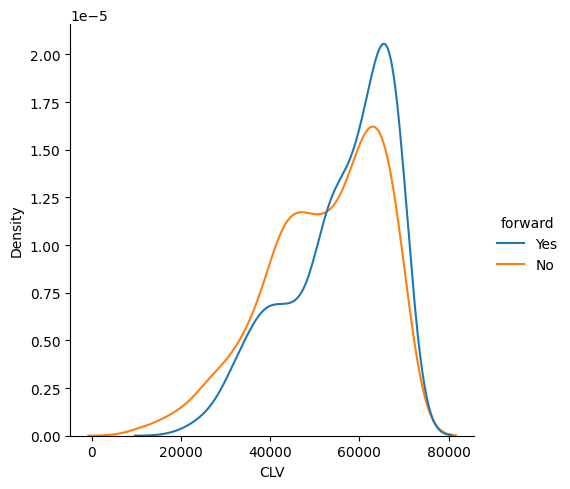

In [28]:
sns.displot(data=df, kind='kde', x='CLV', hue='forward')

In [29]:
df.groupby("forward")[["CLV"]].mean()

,CLV
forward,
No,51991.983041
Yes,55848.245284


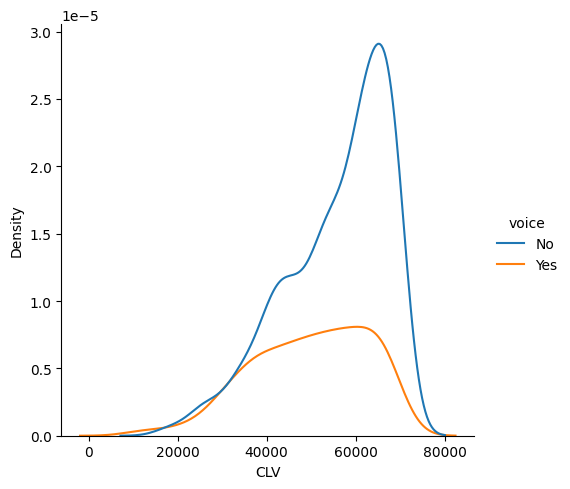

In [30]:
sns.displot(data=df, kind='kde', x='CLV', hue='voice')

In [31]:
df.groupby("voice")[["CLV"]].mean()

,CLV
voice,
No,55692.220256
Yes,49774.128383


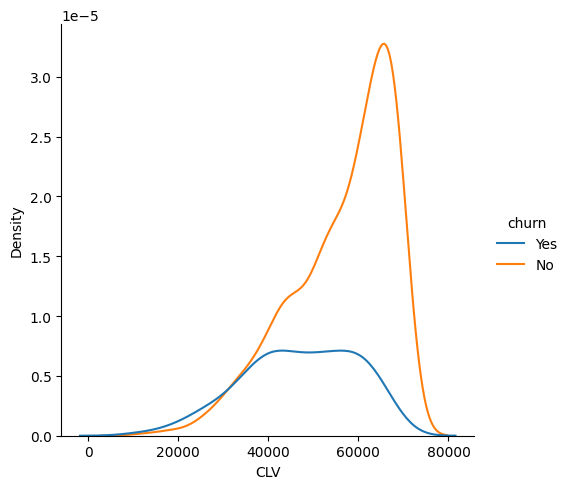

In [32]:
sns.displot(data=df, kind='kde', x='CLV', hue='churn')

Our final model was the LogNormal model.

People who are married have more CLV in average then unmarried people.

There is no visible significant difference of average CLV between different education levels.

To retain customers, it's crucial to listen to customer feedback and enhance their interaction with the company. Continuously experimenting with novel strategies to ensure customer satisfaction is vital for sustained prosperity.